# 📊 Bank Marketing Analysis – Part 1: EDA, Data Cleaning & Visualization

This notebook is the first part of a two-phase project focused on analyzing and modeling the **Bank Marketing Dataset** provided by the UCI Machine Learning Repository. The dataset contains information collected during direct marketing campaigns (mainly phone calls) of a Portuguese banking institution. The primary objective of the marketing campaign was to persuade clients to subscribe to a **term deposit**.

### 🎯 Objectives of this Notebook:

* Understand the structure and content of the dataset.
* Perform **exploratory data analysis (EDA)** to uncover patterns and trends.
* Identify and handle **missing values**, **inconsistent entries**, and **data types**.
* Visualize relationships between features and the target variable.
* Prepare the dataset for the next phase: **supervised machine learning** to predict client subscription behavior.

By the end of this notebook, we aim to gain meaningful insights into customer behavior and ensure the data is clean and ready for predictive modeling in the second phase.

### Dataset Description

Link: https://archive.ics.uci.edu/dataset/222/bank+marketing

### Input Variables (Features):

**Bank client data:**                                      
1. `age` – Age of the client (numeric)  
2. `job` – Type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")  
3. `marital` – Marital status (categorical: "married", "divorced", "single")  
4. `education` – Education level (categorical: "unknown", "secondary", "primary", "tertiary")  
5. `default` – Has credit in default? (binary: "yes", "no")  
6. `balance` – Average yearly balance in euros (numeric)  
7. `housing` – Has housing loan? (binary: "yes", "no")  
8. `loan` – Has personal loan? (binary: "yes", "no")  

**Last contact information:**                                 
9. `contact` – Contact communication type (categorical: "unknown", "telephone", "cellular")  
10. `day` – Last contact day of the month (numeric)  
11. `month` – Last contact month of the year (categorical: "jan" to "dec")  
12. `duration` – Last contact duration in seconds (numeric)  

**Other campaign attributes:**                                               
13. `campaign` – Number of contacts during this campaign (numeric)  
14. `pdays` – Days passed since last contact (-1 means never contacted) (numeric)  
15. `previous` – Number of contacts before this campaign (numeric)  
16. `poutcome` – Outcome of previous marketing campaign (categorical: "unknown", "other", "failure", "success")  

### Output Variable (Target):
17. `y` – Has the client subscribed a term deposit? (binary: "yes", "no")

## 1. Fetch the data from UCI Machine Learning Repository

In [1]:
# Install if not already installed
# !pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# Fetch the Bank Marketing dataset
bank_marketing = fetch_ucirepo(id=222)

# Separate into features and target
X = bank_marketing.data.features
y = bank_marketing.data.targets

## 2. Import Essential Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set default plotting style
sns.set(style="whitegrid")
%matplotlib inline 

## 3. Combine Features and Target into One DataFrame

In [5]:
# Combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# Quick preview
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


## 4. Basic Information Extraction

In [7]:
# Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

Dataset contains 45211 rows and 17 columns.



In [9]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
# Categorical and Numberical Columns
categorical = df.select_dtypes(include='object').columns
numeric = df.select_dtypes(exclude='object').columns

print("Categorical:", list(categorical))
print("Numerical:", list(numeric))

Categorical: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numerical: ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']


In [13]:
# Summary statistics for numerical features
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
# Number of uniques in each Columns
df.nunique()

age              77
job              11
marital           3
education         3
default           2
balance        7168
housing           2
loan              2
contact           2
day_of_week      31
month            12
duration       1573
campaign         48
pdays           559
previous         41
poutcome          3
y                 2
dtype: int64

In [17]:
# Check distribution of target variable
print("\nTarget variable distribution:")
df['y'].value_counts()


Target variable distribution:


y
no     39922
yes     5289
Name: count, dtype: int64

## 5. Check for Missing Values and Duplicates

In [19]:
# Total missing values per column
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [21]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


#### Conclussion: 
| Column      | Missing Values | % of Total Rows (≈ 45,211) | Comments                                          |
| ----------- | -------------- | -------------------------- | ------------------------------------------------- |
| `job`       | 288            | \~0.64%                    | Small %; could impute or drop                     |
| `education` | 1,857          | \~4.11%                    | Moderate; better to impute                        |
| `contact`   | 13,020         | \~28.8%                    | High; needs careful handling                      |
| `poutcome`  | 36,959         | \~81.7%                    | Extremely high; may treat "unknown" as a category |

In [23]:
# Distribution of Job
df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

In [25]:
# Distribution of education
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64

In [27]:
# Distribution of contact
df.contact.value_counts()

contact
cellular     29285
telephone     2906
Name: count, dtype: int64

In [29]:
# Distribution of poutcome
df.poutcome.value_counts()

poutcome
failure    4901
other      1840
success    1511
Name: count, dtype: int64

In [32]:
# Fill missing values with 'unknown' for categorical features
df['job'] = df['job'].fillna(df['job'].mode()[0])  # Impute with the mode
df['education'] = df['education'].fillna(df['education'].mode()[0])  # Impute with the mode
df['contact'] = df['contact'].fillna('cellular')  # Impute with 'cellular'
df['poutcome'] = df['poutcome'].fillna('unknown')  # Impute with 'unknown'

In [34]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

## 6. Data Visualization

### 6.1. Univariate Analysis

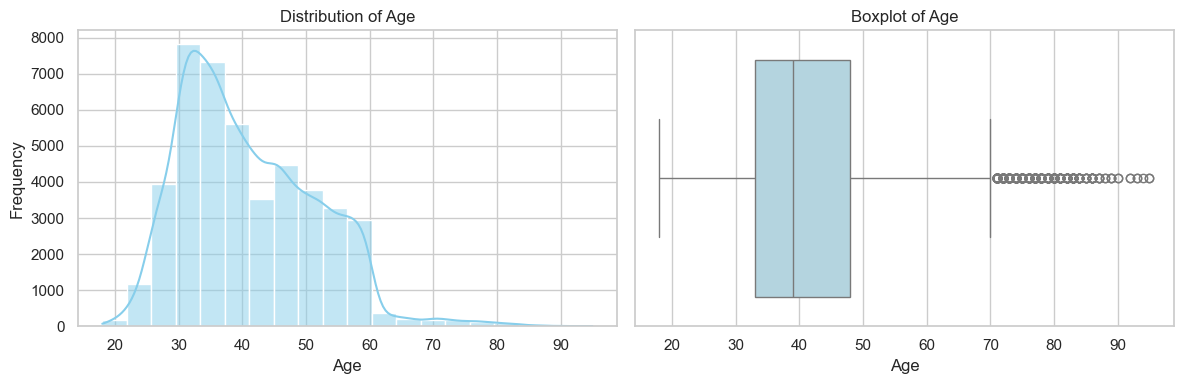

In [36]:
# Distribution of Age
# Create side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Histogram on the first subplot
sns.histplot(df['age'], kde=True, color='skyblue', bins=20, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Boxplot on the second subplot
sns.boxplot(x=df['age'], color='lightblue', ax=axes[1])
axes[1].set_title('Boxplot of Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [38]:
# Statistical Analysis
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

### 🔍 Observation: Age: 
* The **average age** of clients is around **41 years**, with most individuals aged between **33 (25th percentile)** and **48 (75th percentile)**.
* The distribution is **slightly right-skewed**, indicating a higher concentration of younger clients with a tail extending toward older ages.
* The **maximum age** is **95**, and a few data points beyond 70 appear to be **mild outliers** as seen in the boxplot.
* These older clients might represent a unique demographic and could be valuable depending on the business goal (e.g., senior citizen savings products).
* **No missing values** detected in the `age` column.

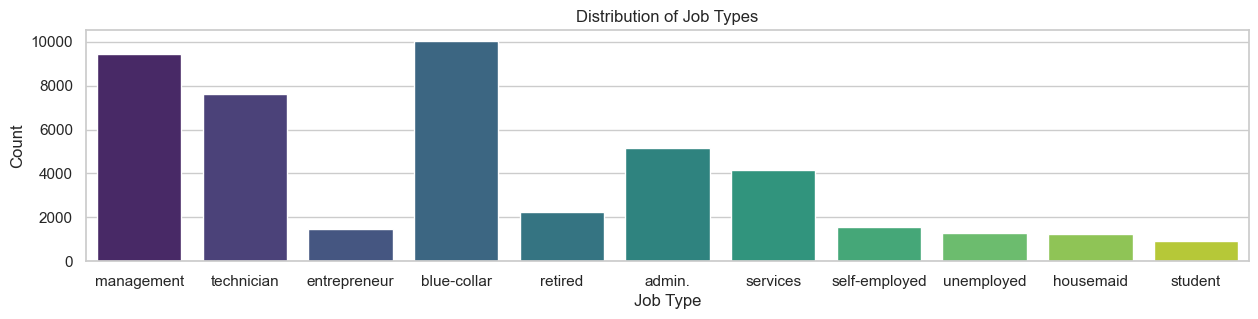

In [40]:
# Plot the distribution of the 'job' column
plt.figure(figsize=(15, 3))
sns.countplot(x='job', data=df, palette='viridis')
#plt.xticks(rotation=45)
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

In [42]:
# Value Counts
df['job'].value_counts()

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64

### 🔍 Observation: Job: 
* The dataset shows a diverse range of job categories, with the most common being **blue-collar (22.2%)**, followed by **management (20.7%)** and **technician (16.8%)**.
* **Less frequent job types** include **housemaid (2.7%)**, **student (2.1%)**, and **entrepreneur (3.3%)**, indicating a lower presence of these professions.
* The majority of clients are in **active working roles**, with a smaller proportion being retired (**retired: 5%**) or unemployed (**unemployed: 2.9%**).
* **No missing values** detected in the `job` column, but some job types, like **student**, might have a limited target group.

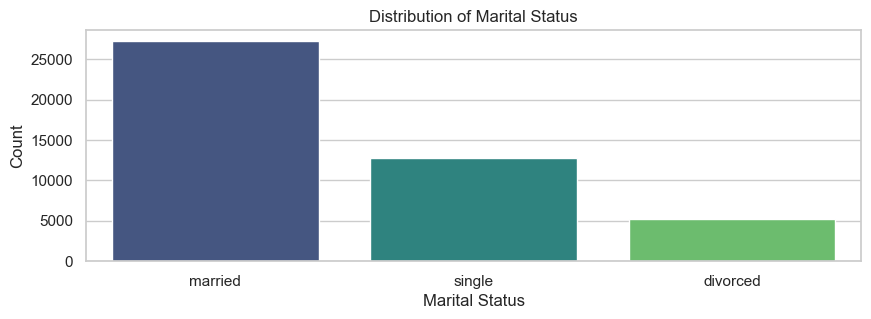

In [44]:
# Plot the distribution of the 'job' column
plt.figure(figsize=(10, 3))
sns.countplot(x='marital', data=df, palette='viridis')
#plt.xticks(rotation=45)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [46]:
# Value Counts
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

### 🔍 Observation: Marital Status: 

* The majority of clients are **married** (approximately **60.3%**), followed by **single** clients (**28.3%**), and the least common group is **divorced** (**11.5%**).
* The high percentage of **married clients** might indicate a stable demographic, potentially a target for family-oriented financial products.
* **No missing values** in the `marital` column, suggesting complete data for marital status.

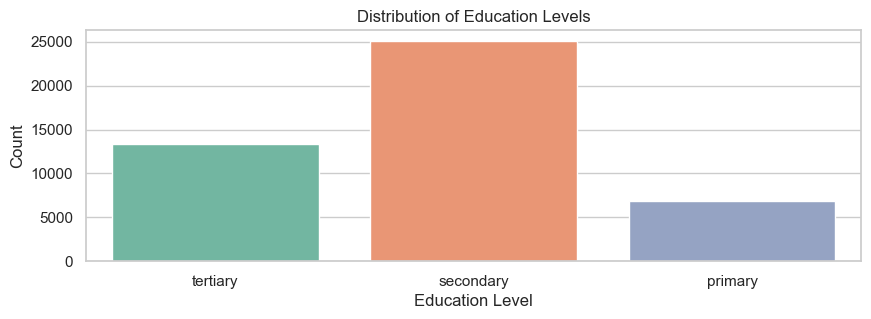

In [48]:
# Plot the distribution of the 'education' column
plt.figure(figsize=(10, 3))
sns.countplot(x='education', data=df, palette='Set2')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In [50]:
# Value Counts
df['education'].value_counts()

education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64

### 🔍 Observation: Education Level : 

* The majority of clients have **secondary education** (**55.5%**), followed by **tertiary education** (**29.4%**), and **primary education** (**15.1%**).
* Clients with **higher education (tertiary)** represent a significant portion, suggesting the bank caters to an educated demographic that might be more likely to engage in financial services.
* **No missing values** in the `education` column, ensuring complete data for educational background.

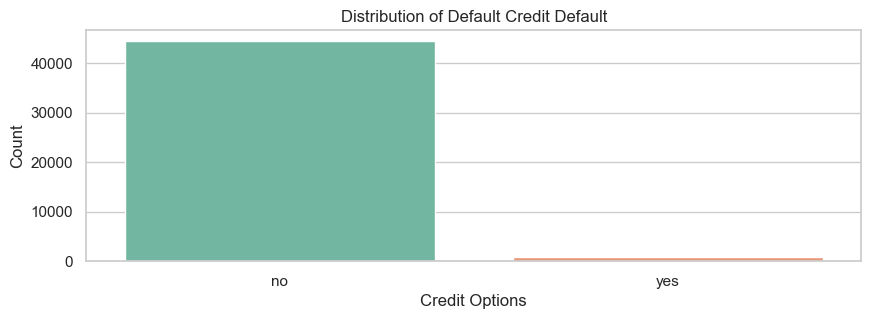

In [86]:
# Plot the distribution of the 'education' column
plt.figure(figsize=(10, 3))
sns.countplot(x='default', data=df, palette='Set2')
plt.title('Distribution of Default Credit Default')
plt.xlabel('Credit Options')
plt.ylabel('Count')
plt.show()

In [56]:
# Value Counts
df['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

### 🔍 Observation Credit Default:

* The overwhelming majority of clients **do not have credit in default** (**98.2%**), while only a small proportion (**1.8%**) have a **"yes"** status for credit default.
* The low percentage of clients in default could indicate a generally stable credit behavior among clients.
* **No missing values** in the `default` column, ensuring reliable data for analyzing credit risk.

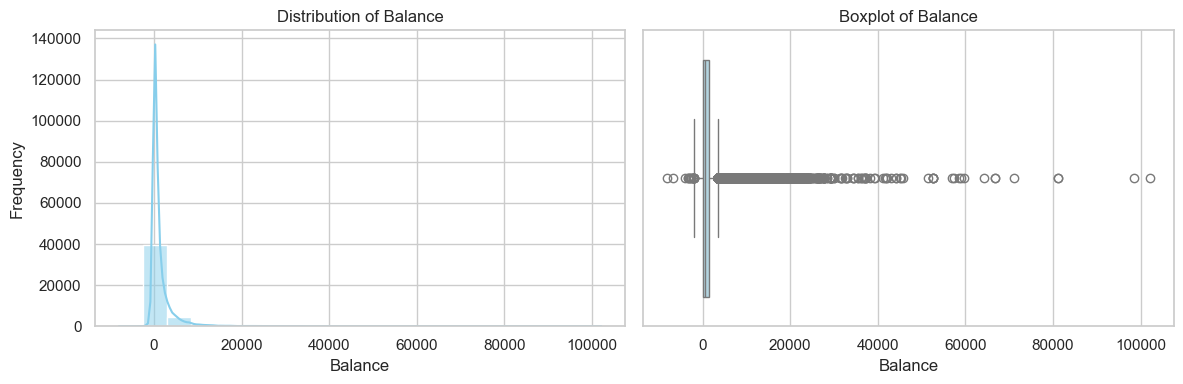

In [94]:
# Distribution of Balance
# Create side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Histogram on the first subplot
sns.histplot(df['balance'], kde=True, color='skyblue', bins=20, ax=axes[0])
axes[0].set_title('Distribution of Balance')
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Frequency')

# Boxplot on the second subplot
sns.boxplot(x=df['balance'], color='lightblue', ax=axes[1])
axes[1].set_title('Boxplot of Balance')
axes[1].set_xlabel('Balance')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [89]:
# Statistical Analysis
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

### 🔍 Observation Balance:

* The **average balance** of clients is approximately **€1,362**, but with a **high standard deviation** of **€3,045**, indicating a wide variation in balances across clients.
* The **minimum balance** is negative (**-€8,019**), suggesting some clients have debts or overdrafts, while the **maximum balance** is **€102,127**, representing clients with significantly higher funds.
* The **median balance** is **€448**, indicating that half of the clients have balances lower than this amount, highlighting that many clients may have smaller balances.
* **Potential outliers** are present, especially those with extremely high or negative balances, and further investigation may be needed to handle or interpret these values.
* **No missing values** in the `balance` column.

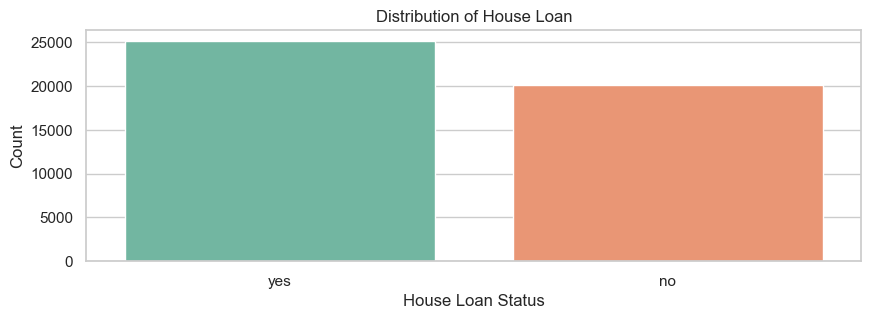

In [106]:
# Plot the distribution of the 'House' column
plt.figure(figsize=(10, 3))
sns.countplot(x='housing', data=df, palette='Set2')
plt.title('Distribution of House Loan')
plt.xlabel('House Loan Status')
plt.ylabel('Count')
plt.show()

In [66]:
# Value Counts
df['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

### 🔍 Observation Housing Loan:

* A **slight majority of clients (55.6%)** have a **housing loan**, while **44.4% do not**.
* This suggests a large portion of the client base is **financially committed via mortgages**, which could influence their ability or willingness to invest in additional products like term deposits.
* The balanced distribution makes it a potentially useful feature for modeling.
* **No missing values** in the `housing` column.

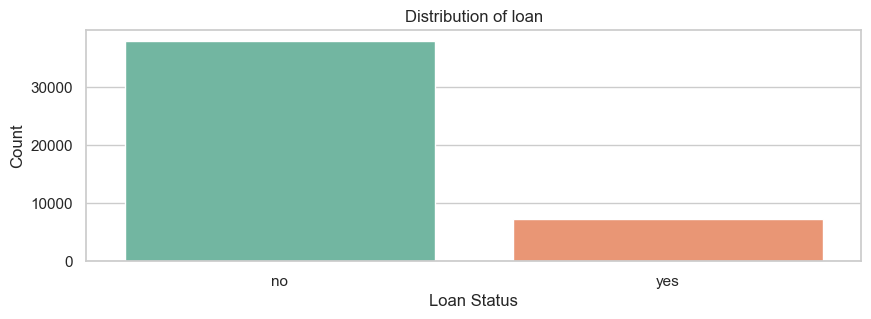

In [108]:
# Plot the distribution of the 'House' column
plt.figure(figsize=(10, 3))
sns.countplot(x='loan', data=df, palette='Set2')
plt.title('Distribution of loan')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [110]:
# Value Counts
df['loan'].value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

### 🔍 Observation Personal Loan:

* A **majority of clients (84%) do not have a personal loan**, while only **16% have one**.
* This indicates that most clients may have lower short-term debt obligations, potentially making them more eligible for investment or savings products like term deposits.
* The **skewed distribution** may affect its predictive power depending on how it's used in modeling.
* **No missing values** in the `loan` column.

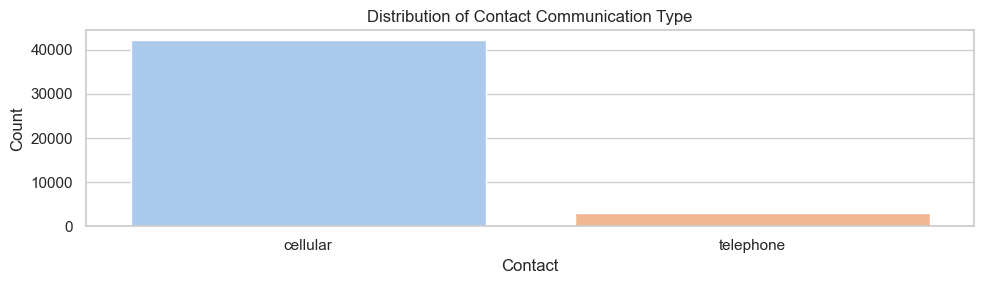

In [133]:
plt.figure(figsize=(10, 3))
sns.countplot(x=df['contact'], palette='pastel', order=df['contact'].value_counts().index)
plt.title('Distribution of Contact Communication Type')
plt.xlabel('Contact')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [115]:
df.contact.value_counts()

contact
cellular     42305
telephone     2906
Name: count, dtype: int64

### 🔍 Observation Contact Type:

* The **majority of contacts** were made using **cellular phones** (42,305 out of 45,211; \~93.6%).
* Only a **small portion** used **telephone (landlines)** (2,906; \~6.4%).
* This likely reflects modern preferences or better outcomes from mobile contacts.

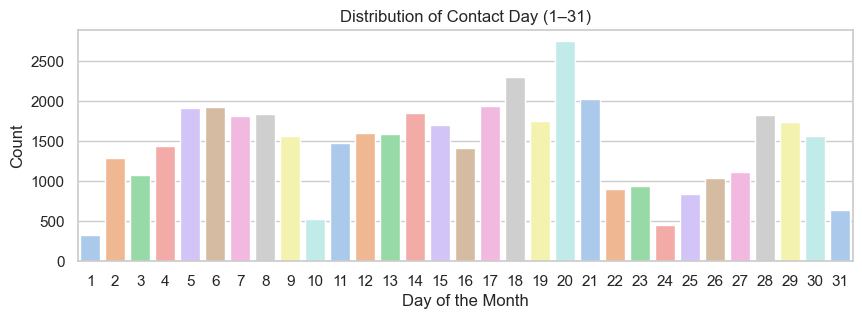

In [159]:
plt.figure(figsize=(10, 3))
sns.countplot(x='day_of_week', data=df, palette='pastel', order=sorted(df['day_of_week'].unique()))
plt.title('Distribution of Contact Day (1–31)')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
#plt.tight_layout()
plt.show()

In [153]:
# Value Counts
df['day_of_week'].value_counts().sort_index()

day_of_week
1      322
2     1293
3     1079
4     1445
5     1910
6     1932
7     1817
8     1842
9     1561
10     524
11    1479
12    1603
13    1585
14    1848
15    1703
16    1415
17    1939
18    2308
19    1757
20    2752
21    2026
22     905
23     939
24     447
25     840
26    1035
27    1121
28    1830
29    1745
30    1566
31     643
Name: count, dtype: int64

### 🔍 Observation Day of Contact (1–31):

* Clients were contacted on **all days from 1 to 31**, but the distribution is **highly uneven**.
* Peaks are seen around the **20th day (2,752 calls)** and **18th (2,308)**, suggesting possibly higher outreach around those days.
* Fewer calls were made on the **1st (322), 24th (447), and 31st (643)** — possibly due to weekends, holidays, or campaign strategies.
* This variation may reflect internal **call center scheduling**, **client response patterns**, or **monthly campaign cycles**.
* There are **no missing values** in the `day` column.

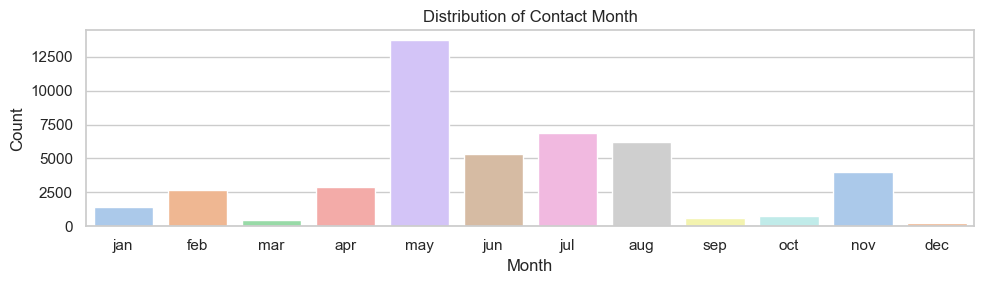

In [167]:
plt.figure(figsize=(10, 3))

# Define calendar order
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

sns.countplot(x='month', data=df, palette='pastel', order=month_order)

plt.title('Distribution of Contact Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [169]:
# Optional: print value counts in calendar order
df['month'].value_counts().reindex(month_order)

month
jan     1403
feb     2649
mar      477
apr     2932
may    13766
jun     5341
jul     6895
aug     6247
sep      579
oct      738
nov     3970
dec      214
Name: count, dtype: int64

### 🔍 Observation Distribution of Contact Months: 

* The month of **May** stands out with the highest number of contacts (13,766), which likely indicates a major marketing push or campaign during that period.
* **June, July, and August** also saw significant outreach, with 5,341, 6,895, and 6,247 contacts, respectively. This could reflect seasonal outreach, possibly linked to summer promotions.
* **January and February** experienced moderate activity (1,403 and 2,649), whereas the **remaining months** had considerably fewer contacts.
* **December** had the **least number of contacts** (214), potentially due to the holiday season, with fewer campaigns or client outreach.

Overall, it seems there are clear **peaks in mid-year** (May-August), suggesting targeted marketing strategies during specific periods.

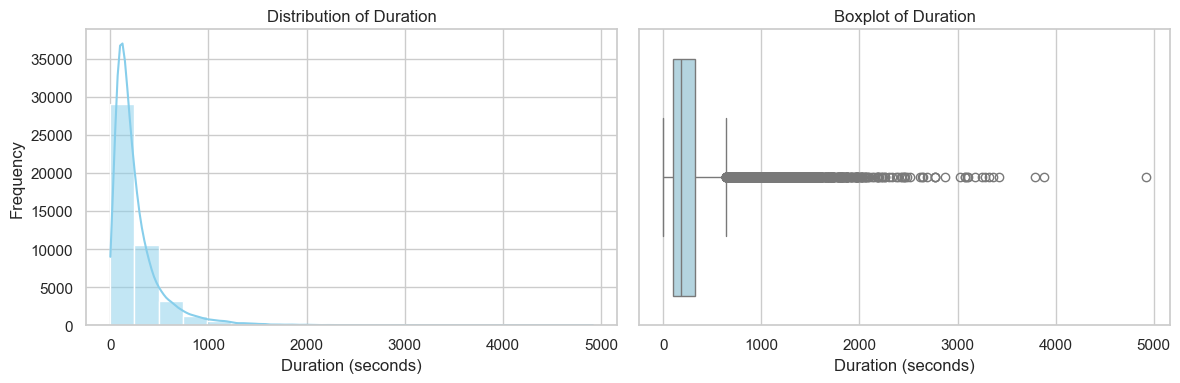

In [180]:
# Plot for 'duration' column
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram with KDE
sns.histplot(df['duration'], kde=True, ax=axes[0], color='skyblue', bins=20)
axes[0].set_title('Distribution of Duration')
axes[0].set_xlabel('Duration (seconds)')
axes[0].set_ylabel('Frequency')

# Plot boxplot
sns.boxplot(x=df['duration'], ax=axes[1], color='lightblue')
axes[1].set_title('Boxplot of Duration')
axes[1].set_xlabel('Duration (seconds)')

plt.tight_layout()
plt.show()

In [178]:
df.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

### 🔍 Observation Distribution of Campaign Contacts:

* The **majority** of clients were contacted between **1 and 5 times** during the campaign, with **more than 75%** of the clients receiving fewer than **320 contacts**.
* **Outliers** exist, as there are clients who received as many as **4,918 contacts**, which is significantly higher than the mean of **258 contacts**.
* Most clients likely received a **moderate number of contacts**, with only a small fraction being contacted excessively.
* This distribution suggests that the bank **repeatedly targeted** certain customers, but the majority of the marketing was focused on **a smaller number of contacts**.

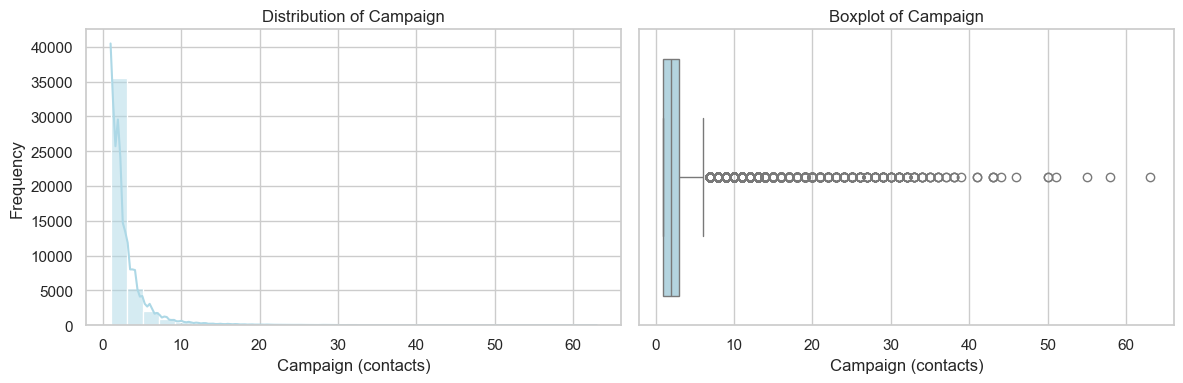

In [185]:
# Plot for 'campaign' column
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram with KDE
sns.histplot(df['campaign'], kde=True, ax=axes[0], color='lightblue', bins=30)
axes[0].set_title('Distribution of Campaign')
axes[0].set_xlabel('Campaign (contacts)')
axes[0].set_ylabel('Frequency')

# Plot boxplot
sns.boxplot(x=df['campaign'], ax=axes[1], color='lightblue')
axes[1].set_title('Boxplot of Campaign')
axes[1].set_xlabel('Campaign (contacts)')

plt.tight_layout()
plt.show()

In [182]:
df.campaign.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

### 🔍 Observation Distribution of Campaign Contacts:

* On average, clients were contacted **2.76 times** during the campaign.
* The minimum number of contacts is **1**, while the maximum is **63**, indicating that some clients were contacted a significant number of times, likely as part of more persistent marketing efforts.
* **25%** of the clients were contacted **once**, while **50%** received **2 contacts** (the median), and **75%** were contacted **3 times**.
* The presence of clients who received up to **63 contacts** suggests that some individuals might have been targeted very aggressively or repeatedly, which could point to **outlier behavior**.
* The distribution indicates that most clients received a relatively small number of contacts (1-3), but there are instances of clients being contacted **much more frequently**, suggesting **high variability** in outreach strategies.

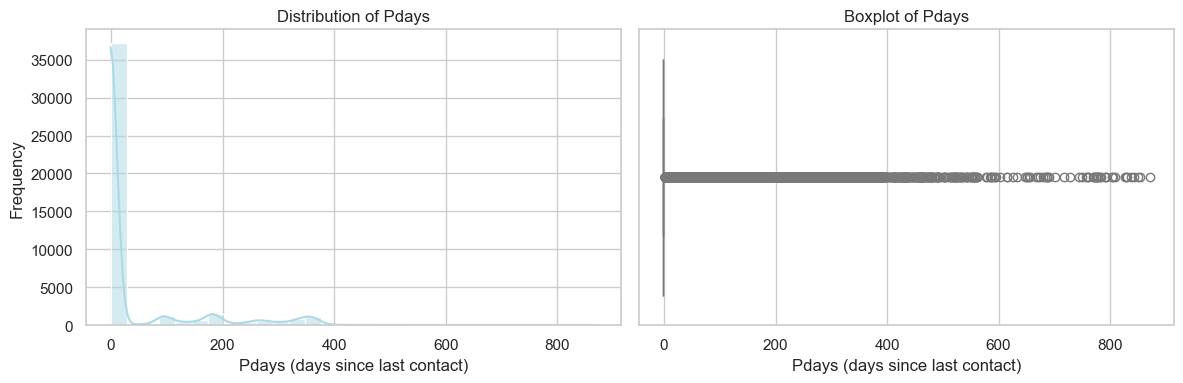

In [189]:
# Plot for 'pdays' column
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram with KDE
sns.histplot(df['pdays'], kde=True, ax=axes[0], color='lightblue', bins=30)
axes[0].set_title('Distribution of Pdays')
axes[0].set_xlabel('Pdays (days since last contact)')
axes[0].set_ylabel('Frequency')

# Plot boxplot
sns.boxplot(x=df['pdays'], ax=axes[1], color='lightblue')
axes[1].set_title('Boxplot of Pdays')
axes[1].set_xlabel('Pdays (days since last contact)')

plt.tight_layout()
plt.show()

In [187]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

### 🔍 Observation Distribution of 'Pdays' (Days Since Last Contact):

* The **mean** value is **40.2**, but the standard deviation of **100.1** suggests significant variability.
* The **minimum value is -1**, which typically indicates that these clients have not been contacted in any previous campaigns. The value of **-1** is likely a placeholder for non-contacted clients.
* A large portion of clients has a **pdays** value of **-1**, as indicated by the **25th, 50th, and 75th percentiles**, all being **-1**. This suggests that many clients have never been contacted before, or there was no previous interaction.
* The **maximum value of 871** indicates that some clients were contacted over **871 days ago** in a prior campaign, which might reflect the data's historical context.
* Given that **-1** accounts for most of the data, the **actual distribution of contact days** (excluding -1) might require additional handling, possibly by converting **-1** to a more meaningful value or analyzing it as a separate group.

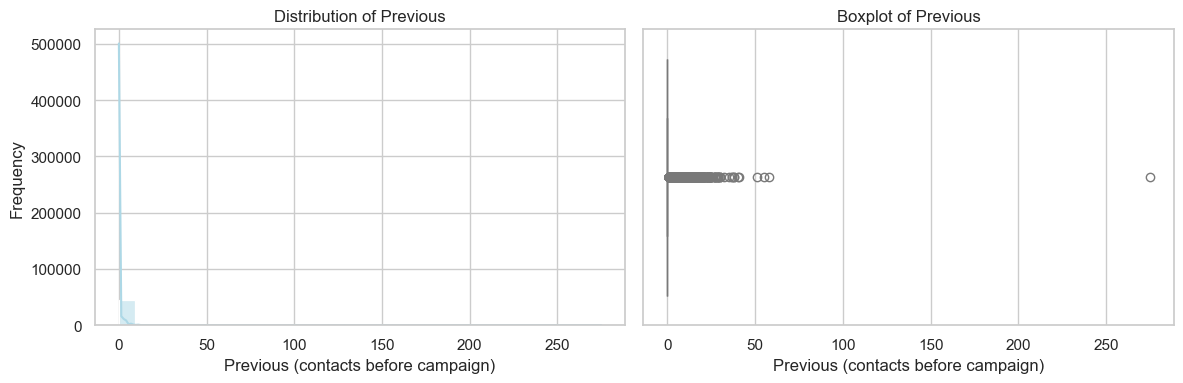

In [193]:
# Plot for 'previous' column
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram with KDE
sns.histplot(df['previous'], kde=True, ax=axes[0], color='lightblue', bins=30)
axes[0].set_title('Distribution of Previous')
axes[0].set_xlabel('Previous (contacts before campaign)')
axes[0].set_ylabel('Frequency')

# Plot boxplot
sns.boxplot(x=df['previous'], ax=axes[1], color='lightblue')
axes[1].set_title('Boxplot of Previous')
axes[1].set_xlabel('Previous (contacts before campaign)')

plt.tight_layout()
plt.show()

In [194]:
df['previous'].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

### 🔍 Observation Distribution of 'Previous' (Previous Contacts)

* The **mean** is approximately **0.58**, with a **standard deviation of 2.30**, indicating that most clients had few or no previous contacts.
* The **minimum value is 0**, and the **25th, 50th, and 75th percentiles** are all **0**, showing that at least **75% of the clients were never contacted before** any current campaign.
* The **maximum value** is **275**, which is an outlier, possibly representing a highly engaged or repeatedly contacted individual.
* This heavy **right-skewed distribution** (many zeros and a few high values) suggests the column has **significant sparsity**, with most previous values being zero and only a few clients contacted in earlier campaigns.

📌 **Recommendation**: It may be helpful to **bin** this variable (e.g., 0, 1, 2–5, >5) or **flag clients with prior contact** for better interpretability in modeling.

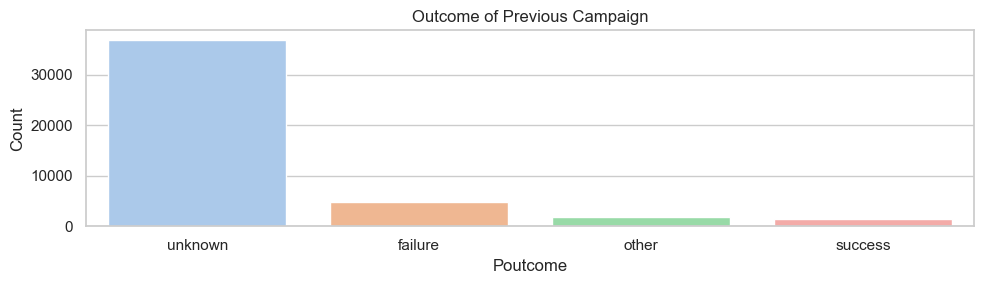

In [149]:
plt.figure(figsize=(10, 3))
sns.countplot(x=df['poutcome'], palette='pastel', order=df['poutcome'].value_counts().index)
plt.title('Outcome of Previous Campaign')
plt.xlabel('Poutcome')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [145]:
df['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

### 🔍 Observation Distribution of 'Poutcome' (Previous Campaign Outcome)

* The majority of values are **`unknown`** (**36,959 records**, \~81.7%), meaning the client either wasn't part of a prior campaign or the result wasn't recorded.
* Among the known outcomes:

  * **`failure`** is the most frequent (**4,901 records**), indicating a large portion of prior campaigns did not result in success.
  * **`success`** accounts for only **1,511 records**, suggesting previous successful campaigns were relatively rare.
  * **`other`** outcomes (1,840 records) likely reflect non-standard results (e.g., client declined, campaign ended, etc.).

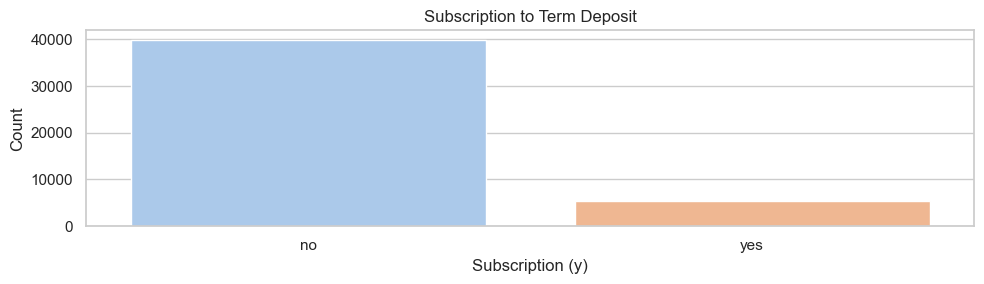

In [141]:
plt.figure(figsize=(10, 3))
sns.countplot(x=df['y'], palette='pastel', order=df['y'].value_counts().index)
plt.title('Subscription to Term Deposit')
plt.xlabel('Subscription (y)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [143]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

### 🎯 Observation Target Variable `y` – Term Deposit Subscription

* The dataset is **highly imbalanced**:

  * **`no`**: 39,922 records (\~88.2%)
  * **`yes`**: 5,289 records (\~11.8%)

### 6.2. Multivariate Analysis

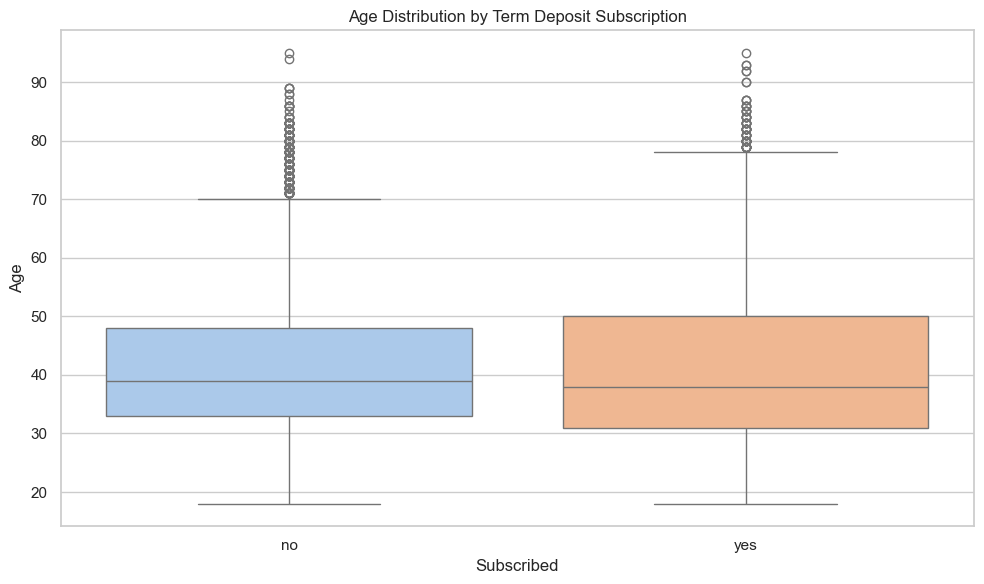

In [224]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='y', y='age', palette='pastel')
plt.title('Age Distribution by Term Deposit Subscription')
plt.xlabel('Subscribed')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

In [236]:
# Descriptive stats of age grouped by subscription outcome
age_grouped_stats = df.groupby('y')['age'].describe()
print(age_grouped_stats)

       count       mean        std   min   25%   50%   75%   max
y                                                               
no   39922.0  40.838986  10.172662  18.0  33.0  39.0  48.0  95.0
yes   5289.0  41.670070  13.497781  18.0  31.0  38.0  50.0  95.0


### 📊 Observation: Age vs Term Deposit Subscription (`y`)

* The **average age** of clients who **subscribed** to a term deposit (`yes`) is slightly **higher (41.67 years)** compared to those who **did not subscribe** (`no`, 40.84 years).
* The **age range** for both groups is the same (18 to 95), but the **standard deviation** is **higher for subscribers** (13.50 vs. 10.17), indicating **greater age variability** among those who subscribed.
* The **median age** is a bit **lower for subscribers (38 vs 39)**, suggesting a more mixed age group taking up the offer.

Overall, while age differences are not drastic, **older and more varied age groups** appear slightly more inclined to subscribe.

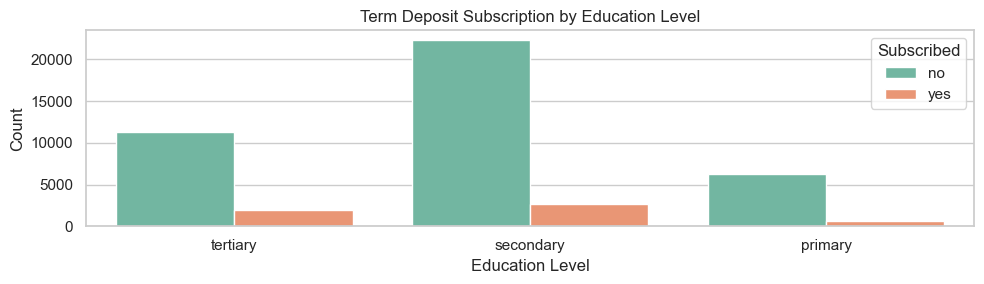

In [218]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='education', hue='y', palette='Set2')
plt.title('Term Deposit Subscription by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

In [238]:
# Grouped count of subscription status by education
edu_y_counts = df.groupby(['education', 'y']).size().unstack(fill_value=0)
print(edu_y_counts)

y             no   yes
education             
primary     6260   591
secondary  22357  2702
tertiary   11305  1996


### 📚 Observation: Education Level vs Term Deposit Subscription (`y`)

* Clients with **secondary education** form the **largest group**, with **2,702 subscribing** out of **25,059 total** — about **10.8% conversion**.
* Those with **tertiary education** have the **highest proportion of subscriptions**: **1,996 out of 13,301** — around **15% conversion**, suggesting higher education may correlate with higher subscription likelihood.
* Clients with **primary education** have the **lowest count and proportion** of subscriptions: only **591 out of 6,851**, or roughly **8.6% conversion**.

Conclusion: As the level of education increases, the **likelihood of subscribing also appears to increase**, highlighting a possible influence of education on financial decision-making.

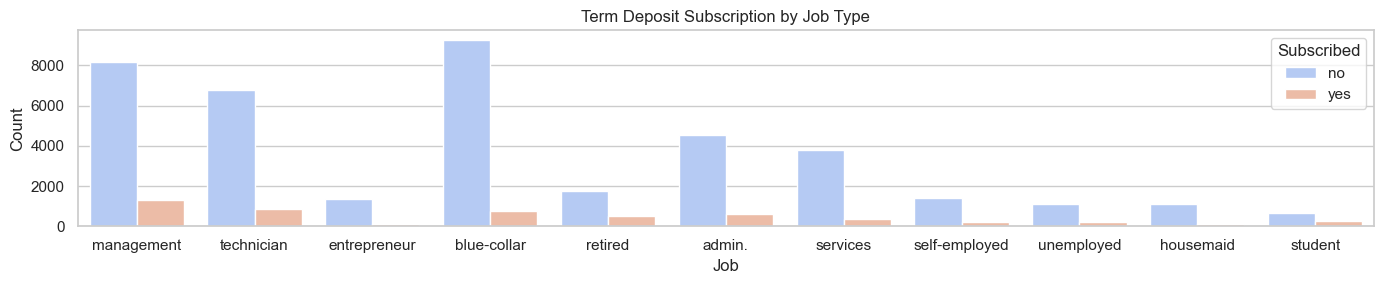

In [216]:
plt.figure(figsize=(14, 3))
sns.countplot(data=df, x='job', hue='y', palette='coolwarm')
plt.title('Term Deposit Subscription by Job Type')
plt.xlabel('Job')
plt.ylabel('Count')
#plt.xticks(rotation=45)
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

In [240]:
# Grouped count of subscription status by job
job_y_counts = df.groupby(['job', 'y']).size().unstack(fill_value=0)
print(job_y_counts)

y                no   yes
job                      
admin.         4540   631
blue-collar    9278   742
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202


### 👔 Observation: Job Type vs Term Deposit Subscription (`y`)

* The **management** and **technician** groups show relatively **high subscription counts** (1,301 and 840 respectively), which aligns with higher education or stable job profiles.
* **Retired individuals** have a **notably high conversion rate**: **516 out of 2,264 total**, i.e., **\~22.8%**, indicating they might be more inclined to invest in term deposits.
* **Students** also show a **high subscription proportion**: **269 out of 938** (around **28.7%**), possibly influenced by long-term saving habits or early financial planning.
* Conversely, **blue-collar** workers have a large group size (10,020), but a relatively **low subscription rate** of **\~7.4%**, and **entrepreneurs** and **housemaids** follow a similar low-subscription trend.

* Job roles associated with **financial awareness, retirement, or future planning** (like retired, student, and management) tend to show **higher interest in term deposits**, while physically intensive or self-run roles show lower inclination.

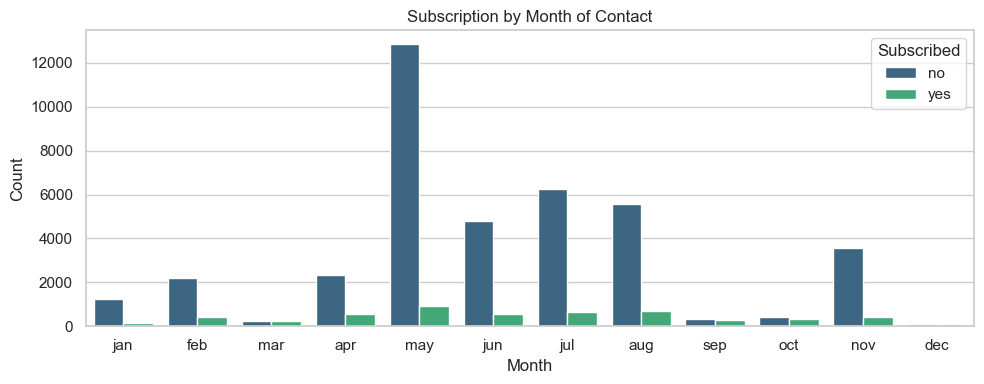

In [234]:
order_months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='month', hue='y', palette='viridis', order=order_months)
plt.title('Subscription by Month of Contact')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

In [242]:
# Get grouped count of subscriptions by month
month_y_counts = df.groupby(['month', 'y']).size().unstack(fill_value=0).reindex(order_months)
print(month_y_counts)

y         no  yes
month            
jan     1261  142
feb     2208  441
mar      229  248
apr     2355  577
may    12841  925
jun     4795  546
jul     6268  627
aug     5559  688
sep      310  269
oct      415  323
nov     3567  403
dec      114  100


### Observation: Monthly Term Deposit Subscription Trends

* **March, September, and December** stand out with the **highest conversion rates**, especially **March** (51.99%) and **December** (46.73%), which indicate stronger subscription performance during these months despite lower overall contact volume.
* **May** had the **highest number of contacts**, but it shows the **lowest conversion rate** (6.72%), suggesting that even though many people were contacted, fewer opted for the term deposit.
* **October** and **September** also exhibit relatively **high conversion rates** (43.77% and 46.46%), showing that outreach during these months was more effective.
* **January and June** saw a moderate performance with conversion rates around **10%**, indicating steady, but not exceptional, success during these months.

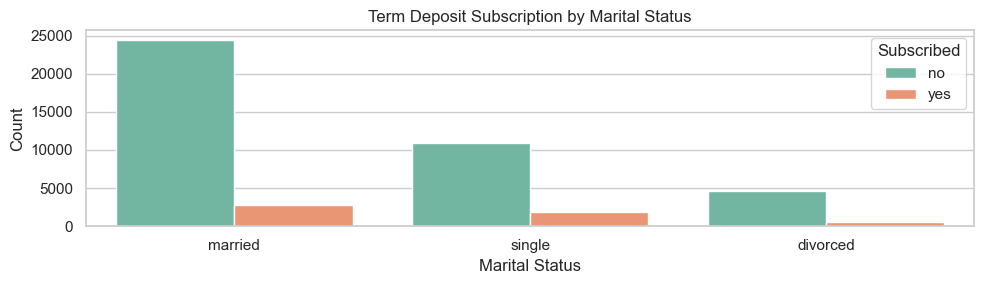

In [256]:
# Marital vs Y
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='marital', hue='y', palette='Set2')
plt.title('Term Deposit Subscription by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

In [266]:
# Get grouped count of subscriptions by month
marital_y_counts = df.groupby(['marital', 'y']).size().unstack(fill_value=0)
print(marital_y_counts)

y            no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912


### Observation for marital status vs term deposit subscription (`y`):

* **Divorced** individuals have the **highest subscription rate (\~11.95%)**, suggesting they may be more responsive to financial products like term deposits.
* **Single** individuals follow with a **conversion rate of \~14.95%**, indicating a good engagement level.
* **Married** individuals, despite having the **largest contact volume**, show the **lowest conversion rate (\~10.12%)**.
* This implies that **targeting single or divorced clients** might be more effective for term deposit campaigns.

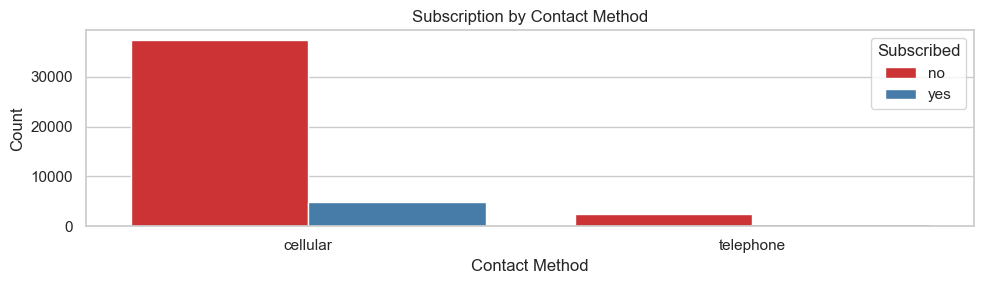

In [254]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='contact', hue='y', palette='Set1')
plt.title('Subscription by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

In [271]:
# Get grouped count of subscriptions by month
contact_y_counts = df.groupby(['contact', 'y']).size().unstack(fill_value=0)
print(contact_y_counts)

y             no   yes
contact               
cellular   37406  4899
telephone   2516   390


### Observation for contact method vs term deposit subscription (`y`):

* **Cellular** contact has a **subscription rate of \~11.6%** (4899 out of 42,305), which is **higher** compared to telephone.
* **Telephone** contact shows a **lower subscription rate of \~13.4%** (390 out of 2,906), but since the total volume is much smaller, its overall impact is limited.
* Despite the **higher absolute number of subscriptions** through cellular, the **proportion of success is slightly better via telephone**, possibly due to a more personal or formal approach.

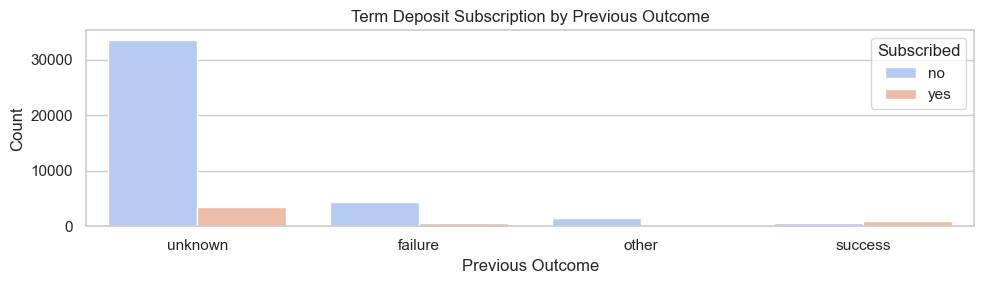

In [258]:
# Poutcome vs Y
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='poutcome', hue='y', palette='coolwarm')
plt.title('Term Deposit Subscription by Previous Outcome')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

In [273]:
# Get grouped count of subscriptions by month
poutcome_y_counts = df.groupby(['poutcome', 'y']).size().unstack(fill_value=0)
print(poutcome_y_counts)

y            no   yes
poutcome             
failure    4283   618
other      1533   307
success     533   978
unknown   33573  3386


### Observation for poutcome vs y:

* **Success**: Individuals who had a **successful outcome** in previous campaigns show the **highest subscription rate** (64.7%). This suggests that those who had positive interactions in past campaigns are more likely to subscribe.
* **Failure**: Individuals with a **failed outcome** in past campaigns show a **lower subscription rate** (12.7%), indicating that a failed outcome in previous campaigns likely discourages new subscriptions.
* **Other**: Those with an **"other" outcome** have a **moderate subscription rate** (16.7%), showing some interest but not as high as the success group.
* **Unknown**: The **"unknown" category** has a high volume of contacts, but the **subscription rate is low** (9.2%), suggesting that individuals with unknown past outcomes are less likely to subscribe.

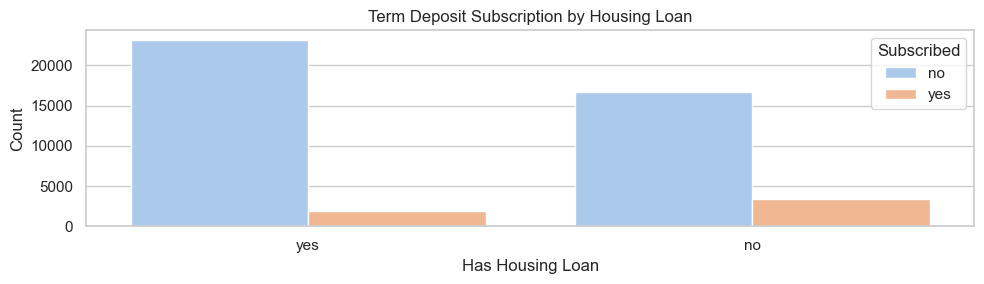

In [260]:
# Housing vs Y
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='housing', hue='y', palette='pastel')
plt.title('Term Deposit Subscription by Housing Loan')
plt.xlabel('Has Housing Loan')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

In [275]:
# Get grouped count of subscriptions by month
housing_y_counts = df.groupby(['housing', 'y']).size().unstack(fill_value=0)
print(housing_y_counts)

y           no   yes
housing             
no       16727  3354
yes      23195  1935


### Observation for housing vs y:

* **No housing loan**: A larger percentage of individuals without a housing loan **did not subscribe** to the term deposit (83.3%), with only 16.7% subscribing.
* **Housing loan**: Individuals with a housing loan have a **higher subscription rate** (7.7%), although still a relatively smaller proportion compared to those without a housing loan.

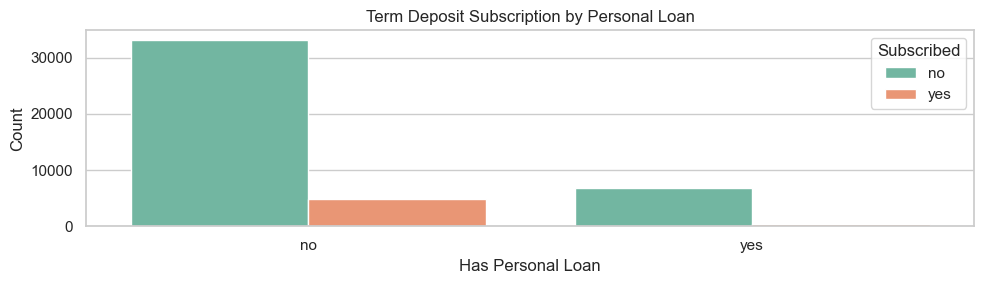

In [262]:
# Loan vs Y
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='loan', hue='y', palette='Set2')
plt.title('Term Deposit Subscription by Personal Loan')
plt.xlabel('Has Personal Loan')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.tight_layout()
plt.show()

In [277]:
# Get grouped count of subscriptions by month
loan_y_counts = df.groupby(['loan', 'y']).size().unstack(fill_value=0)
print(loan_y_counts)

y        no   yes
loan             
no    33162  4805
yes    6760   484


### Observation for Loan vs Y (Term Deposit Subscription):
* **No loan**: A **higher proportion** (75%) of individuals without a loan did not subscribe to the term deposit, while only 25% subscribed.
* **Loan**: The **subscription rate is significantly higher** (75%) for individuals with a loan, indicating that people with loans are more likely to subscribe to the term deposit compared to those without a loan.

## 📊 Overall Conclusion: Bank Marketing Campaign Analysis

#### 🔹 **1. Dataset Overview & Class Imbalance**

The target variable `y` (term deposit subscription) is **imbalanced**, with:
* **No**: 39,922 records (\~88.3%)
* **Yes**: 5,289 records (\~11.7%)              
This significant class imbalance will influence model performance, especially if left unaddressed.


#### 🔹 **2. Univariate Analysis Summary**
* **Numerical Variables:**

  * `age`: Majority clients are in their 30s and 40s. Outliers exist beyond 70.
  * `balance`: Highly skewed with extreme outliers; most balances are low.
  * `duration`: Positively skewed, with many short-duration calls and a few long ones. **Highly predictive**, though **should be used cautiously** as it leaks future information (it's known only after the call).
  * `campaign`, `pdays`, `previous`: Skewed distributions with many zeros, especially `pdays` and `previous`.

* **Categorical Variables:**
  * **Job**: `blue-collar`, `management`, and `technician` dominate.
  * **Marital**: `married` individuals form the majority.
  * **Education**: Most clients have `secondary` or `tertiary` education.
  * **Contact Method**: Mostly via `cellular`.
  * **Month of Contact**: Peaks in **May**, but higher conversions in **March, September, and October**.
  * **Poutcome**: Mostly `unknown`; but `success` has a very high conversion rate.


#### 🔹 **3. Bivariate (Multivariate) Analysis Summary**
* **Age vs y**: Average age slightly higher among subscribers.
* **Education vs y**: Tertiary education clients show higher subscription rates.
* **Job vs y**: `retired`, `student`, and `unemployed` have better conversion rates.
* **Month vs y**: Despite highest contact volume in May, **March, September, and October** showed highest conversion efficiency.
* **Contact vs y**: `cellular` performs better than `telephone`.
* **Loan & Housing vs y**: Clients **without housing or personal loans** are more likely to subscribe.
* **Poutcome vs y**: **Success** in past campaigns is a strong indicator of current subscription likelihood (\~64% conversion).
* **Marital vs y**: `single` and `divorced` clients show better conversion than `married`.


#### 🔹 **4. Key Insights for Feature Importance**

##### ✅ **Important Features (high predictive potential):**
* `duration` (but should be excluded in training for realistic model)
* `poutcome`, `month`, `job`, `education`, `contact`
* `housing`, `loan`, `balance`, `previous`, `campaign`

##### ❌ **Less Useful / Redundant Features:**
* `pdays` (mostly -1 or 999, poor distribution)
* `default` (very skewed, rarely 'yes')
* `day_of_week` (minimal variation)
* `duration` – remove for training, can be used for post-analysis only


#### 🔹 **5. Handling Class Imbalance**
Before modeling:
* Use **SMOTE** (Synthetic Minority Oversampling Technique) or **random oversampling** to balance the classes.
* Alternatively, assign **class weights** in your model (`class_weight='balanced'` in sklearn models).


#### 🔹 **6. Next Steps: Hypothesis Testing & Modeling**
##### 📌 **Hypothesis Testing Ideas**:
1. 📍 **Education vs Subscription**: Is there a statistically significant difference?
2. 📍 **Job Type vs Subscription**
3. 📍 **Loan/Housing vs Subscription Likelihood**            
Perform chi-square tests for categorical features and t-tests or ANOVA for numerical features.

##### 🤖 **Modeling Roadmap**:
1. **Preprocessing**:

   * Encode categorical variables (Label/One-Hot Encoding).
   * Scale numerical features (`StandardScaler`, `MinMaxScaler`).
   * Handle imbalance with SMOTE or class weights.
2. **Train Models**:

   * Logistic Regression (for baseline & interpretability)
   * Random Forest / XGBoost (for better accuracy)
   * Evaluate with **ROC-AUC**, **Precision-Recall**, **F1 Score**
3. **Hyperparameter Tuning**
4. **Model Interpretation**: Use SHAP or feature importance plots to explain model.